In [2]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import uniform, choice
from keras.preprocessing.image import ImageDataGenerator
from dataload import load_dataset
from keras.utils import np_utils 
#import numpy as np
def data():
    nb_classes = 2
    # the data, shuffled and split between train and test sets
    X_train, y_train, X_test, y_test = load_dataset()
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    #Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_train = y_train
    Y_test = y_test
    #Y_test = np_utils.to_categorical(y_test, nb_classes)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
    datagen2 = ImageDataGenerator(rescale=1. / 255)

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(X_train)
    datagen2.fit(X_test)

    return datagen, datagen2, X_train, Y_train, X_test, Y_test

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
def model(datagen, datagen2, X_train, Y_train, X_test, Y_test):
    batch_size = 16
    nb_epoch = 20
    img_width, img_height = 224, 224

    # input image dimensions
    input_shape = (img_width, img_height, 3)
    # the CIFAR10 images are RGB
    model = Sequential()
    model.add(Conv2D(32, (2, 2), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (2, 2)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (2, 2)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, .5)}}))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer={{choice(['adadelta','adam','rmsprop', 'sgd', 'Ftrl', 'Nadam', 'Adamax'])}}, metrics=['accuracy'])

    # fit the model on the batches generated by datagen.flow()
    history = model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size ,
                        epochs=nb_epoch,
                        validation_data= datagen2.flow(X_test, Y_test, batch_size = batch_size),
                        validation_steps=X_test.shape[0] // batch_size)

    score, acc = model.evaluate(X_test, Y_test, verbose=0)

    return {'loss': -acc, 'status': STATUS_OK, 'model': model, 'history.val_loss':history.history['val_loss'], 
           'history.val_acc': history.history['val_accuracy'], 'history.loss': history.history['loss'], 
           'history.acc': history.history['accuracy'] }



In [4]:
datagen, datagen2, X_train, Y_train, X_test, Y_test = data()

trials = Trials()

best_run, best_model = optim.minimize(model=model, data=data, algo=tpe.suggest, max_evals=7, trials=trials, 
                                      notebook_name='hyperopt_notebook')

print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))

getting the data in MNIST Format
X_train shape: (200, 224, 224, 3)
200 train samples
81 test samples
>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import uniform, choice
except:
    pass

try:
    from keras.preprocessing.image import ImageDataGenerator
except:
    pass

try:
    from dataload import load_dataset
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Conv2D, MaxPooling2D
except:
    pass

try:
    from keras.layers import Activation, Dropout, Flatten, Dense
except:
    pass

try:
    from keras import backend as K
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import matplotlib.pyplot as pl

C:\Users\gauravsa\envs\alibi_exp\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '



Epoch 1/20                                                                                                              
 1/12 [=>............................]                                                                                  
 - ETA: 8s - loss: 0.6930 - accuracy: 0.8750                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 2s - loss: 0.6925 - accuracy: 0.6875                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 2s - loss: 0.6954 - accura

10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6767 - accuracy: 0.5395                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6759 - accuracy: 0.5536                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6748 - accuracy: 0.5924                                                                            
                                  

 - ETA: 1s - loss: 0.6220 - accuracy: 0.7188                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6148 - accuracy: 0.7411                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6074 - accuracy: 0.7578                                                                            
                                                                                                                       
 9/12 [=====================>......

                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 3s - loss: 0.4361 - accuracy: 0.8750                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.4357 - accuracy: 0.8750                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.4462 - accurac

12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.3897 - accuracy: 0.8804                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 4s 355ms/step - loss: 0.3897 - accuracy: 0.8804 - val_loss: 0.3866 - val_accuracy: 0.8500                            

Epoch 8/20                                                                                                              
 1/12 [=>............................]                                                                                  
 - ETA: 4s - loss: 0.4527 - accuracy: 0.8125                                                                            
                                

 - ETA: 1s - loss: 0.2440 - accuracy: 0.9417                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 0s - loss: 0.2497 - accuracy: 0.9338                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.2396 - accuracy: 0.9408                                                                            
                                                                                                                       
11/12 [==========================>.

                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.2682 - accuracy: 0.9125                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.2734 - accuracy: 0.8958                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.2603 - accurac

 1/12 [=>............................]                                                                                  
 - ETA: 4s - loss: 0.2450 - accuracy: 0.8750                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.2014 - accuracy: 0.9062                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 2s - loss: 0.2414 - accuracy: 0.8958                                                                            
                                  

 - ETA: 0s - loss: 0.1951 - accuracy: 0.9342                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.2027 - accuracy: 0.9286                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.2058 - accuracy: 0.9239                                                                            
                                                                                                                       
12/12 [============================

                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.2120 - accuracy: 0.9018                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.1922 - accuracy: 0.9141                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 0s - loss: 0.1819 - accurac

 3/12 [======>.......................]                                                                                  
 - ETA: 2s - loss: 0.3340 - accuracy: 0.7708                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.3144 - accuracy: 0.8125                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.2966 - accuracy: 0.8500                                                                            
                                  

 - ETA: 0s - loss: 0.1673 - accuracy: 0.9348                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 4s 356ms/step - loss: 0.1673 - accuracy: 0.9348 - val_loss: 0.1965 - val_accuracy: 0.9000                            

Epoch 20/20                                                                                                             
 1/12 [=>............................]                                                                                  
 - ETA: 5s - loss: 0.2219 - accuracy: 0.8750                                                                            
                                                                                                                       
 2/12 [====>.....................

                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 0s - loss: 0.6932 - accuracy: 0.4559                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6932 - accuracy: 0.4671                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6932 - accurac

 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6931 - accuracy: 0.5125                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 1s - loss: 0.6931 - accuracy: 0.5114                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6931 - accuracy: 0.5096                                                                            
                                  

 - ETA: 5s - loss: 0.6932 - accuracy: 0.3750                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.6932 - accuracy: 0.3438                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 2s - loss: 0.6932 - accuracy: 0.3333                                                                            
                                                                                                                       
 4/12 [=========>..................

                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.4881                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6932 - accuracy: 0.4674                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 4s 363ms/step - loss: 0.6932 - a

 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6931 - accuracy: 0.5536                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6931 - accuracy: 0.5312                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.6931 - accuracy: 0.5278                                                                            
                                  

 - ETA: 2s - loss: 0.6931 - accuracy: 0.5625                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.6931 - accuracy: 0.5625                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6931 - accuracy: 0.5500                                                                            
                                                                                                                       
 6/12 [==============>.............

                                                                                                                       
12/12 [==============================]                                                                                  
 - 5s 388ms/step - loss: 0.6932 - accuracy: 0.5054 - val_loss: 0.6932 - val_accuracy: 0.4625                            

Epoch 12/20                                                                                                             
 1/12 [=>............................]                                                                                  
 - ETA: 5s - loss: 0.6932 - accuracy: 0.4375                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 4s - loss: 0.6931 - accur

 9/12 [=====================>........]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.5139                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.5125                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.5179                                                                            
                                  

 - ETA: 2s - loss: 0.6932 - accuracy: 0.4500                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.6932 - accuracy: 0.4583                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6932 - accuracy: 0.4732                                                                            
                                                                                                                       
 8/12 [===================>........

                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.6932 - accuracy: 0.3750                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 3s - loss: 0.6932 - accuracy: 0.4250                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.6932 - accurac

11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.5060                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.5109                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 5s 420ms/step - loss: 0.6931 - accuracy: 0.5109 - val_loss: 0.6932 - val_accuracy: 0.4750                            

Epoch 19/20                      

 - ETA: 1s - loss: 0.6931 - accuracy: 0.5357                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6931 - accuracy: 0.5703                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.5556                                                                            
                                                                                                                       
10/12 [========================>...

                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.6946 - accuracy: 0.5000                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6943 - accuracy: 0.5139                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 1s - loss: 0.6942 - accurac

12/12 [==============================]                                                                                  
 - 5s 383ms/step - loss: 0.6931 - accuracy: 0.5217 - val_loss: 0.6927 - val_accuracy: 0.8500                            

Epoch 4/20                                                                                                              
 1/12 [=>............................]                                                                                  
 - ETA: 5s - loss: 0.6924 - accuracy: 0.7500                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 2s - loss: 0.6921 - accuracy: 0.7917                                                                            
                                

 - ETA: 1s - loss: 0.6976 - accuracy: 0.5147                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6973 - accuracy: 0.5132                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6969 - accuracy: 0.5119                                                                            
                                                                                                                       
12/12 [============================

                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.6850 - accuracy: 0.6023                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6821 - accuracy: 0.6154                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6899 - accurac

 2/12 [====>.........................]                                                                                  
 - ETA: 5s - loss: 0.6900 - accuracy: 0.6667                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 4s - loss: 0.6911 - accuracy: 0.6000                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 4s - loss: 0.6916 - accuracy: 0.5714                                                                            
                                  

 - ETA: 0s - loss: 0.6920 - accuracy: 0.5417                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6917 - accuracy: 0.5543                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 6s 450ms/step - loss: 0.6917 - accuracy: 0.5543 - val_loss: 0.6913 - val_accuracy: 0.4750                            

Epoch 11/20                                                                                                             
 1/12 [=>........................

                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.7353 - accuracy: 0.5703                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.7263 - accuracy: 0.5833                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.7225 - accurac

 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.6355 - accuracy: 0.6786                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6546 - accuracy: 0.6528                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.6557 - accuracy: 0.6591                                                                            
                                  

 - 5s 390ms/step - loss: 0.4790 - accuracy: 0.8315 - val_loss: 0.4036 - val_accuracy: 0.8750                            

Epoch 16/20                                                                                                             
 1/12 [=>............................]                                                                                  
 - ETA: 6s - loss: 0.4115 - accuracy: 0.8750                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.3829 - accuracy: 0.9062                                                                            
                                                                                                                       
 3/12 [======>...................

                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.3731 - accuracy: 0.8092                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.3531 - accuracy: 0.8274                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.3353 - accurac

 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.2609 - accuracy: 0.8958                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.2365 - accuracy: 0.9107                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.2288 - accuracy: 0.9141                                                                            
                                  

 - ETA: 3s - loss: 0.6920 - accuracy: 0.5000                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 2s - loss: 0.7002 - accuracy: 0.4583                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.6980 - accuracy: 0.4844                                                                            
                                                                                                                       
 5/12 [===========>................

                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6926 - accuracy: 0.5163                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 5s 392ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6849 - val_accuracy: 0.8125                            

Epoch 3/20                                                                                                              
 1/12 [=>............................]                                                                                  
 - ETA: 3s - loss: 0.6815 - accur

 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6300 - accuracy: 0.6667                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.6421 - accuracy: 0.6324                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6332 - accuracy: 0.6579                                                                            
                                  

 - ETA: 2s - loss: 0.4099 - accuracy: 0.8281                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.3936 - accuracy: 0.8333                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.3834 - accuracy: 0.8409                                                                            
                                                                                                                       
 7/12 [================>...........

Epoch 8/20                                                                                                              
 1/12 [=>............................]                                                                                  
 - ETA: 6s - loss: 0.5154 - accuracy: 0.8750                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.3977 - accuracy: 0.8750                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 3s - loss: 0.3814 - accura

10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.1703 - accuracy: 0.9408                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.1739 - accuracy: 0.9405                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.1838 - accuracy: 0.9293                                                                            
                                  

 - ETA: 2s - loss: 0.1372 - accuracy: 0.9688                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.1592 - accuracy: 0.9554                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.1603 - accuracy: 0.9583                                                                            
                                                                                                                       
 9/12 [=====================>......

                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 2s - loss: 0.1484 - accuracy: 0.9250                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.1436 - accuracy: 0.9464                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.1542 - accurac

12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.0633 - accuracy: 0.9728                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 6s 498ms/step - loss: 0.0633 - accuracy: 0.9728 - val_loss: 0.0319 - val_accuracy: 1.0000                            

Epoch 15/20                                                                                                             
 1/12 [=>............................]                                                                                  
 - ETA: 7s - loss: 0.0060 - accuracy: 1.0000                                                                            
                                

 - ETA: 1s - loss: 0.0744 - accuracy: 0.9833                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.0678 - accuracy: 0.9853                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.0639 - accuracy: 0.9868                                                                            
                                                                                                                       
11/12 [==========================>.

                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.0194 - accuracy: 1.0000                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.0266 - accuracy: 0.9896                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.0573 - accurac

 1/12 [=>............................]                                                                                  
 - ETA: 5s - loss: 0.2668 - accuracy: 0.9375                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.2177 - accuracy: 0.9688                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 3s - loss: 0.2535 - accuracy: 0.9375                                                                            
                                  

 - ETA: 0s - loss: 0.6932 - accuracy: 0.4934                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6932 - accuracy: 0.5000                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6932 - accuracy: 0.4837                                                                            
                                                                                                                       
12/12 [============================

                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 2s - loss: 0.6931 - accuracy: 0.5179                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6932 - accuracy: 0.4922                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.6931 - accurac

 3/12 [======>.......................]                                                                                  
 - ETA: 2s - loss: 0.6928 - accuracy: 0.5625                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.6925 - accuracy: 0.5938                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6930 - accuracy: 0.5375                                                                            
                                  

 - ETA: 0s - loss: 0.6933 - accuracy: 0.4674                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 5s 383ms/step - loss: 0.6933 - accuracy: 0.4674 - val_loss: 0.6929 - val_accuracy: 0.8375                            

Epoch 7/20                                                                                                              
 1/12 [=>............................]                                                                                  
 - ETA: 3s - loss: 0.6931 - accuracy: 0.6250                                                                            
                                                                                                                       
 2/12 [====>.....................

                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.6928 - accuracy: 0.5000                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6929 - accuracy: 0.5000                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6928 - accurac

 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6930 - accuracy: 0.5278                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 1s - loss: 0.6936 - accuracy: 0.4773                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6933 - accuracy: 0.5000                                                                            
                                  

 - ETA: 5s - loss: 0.6914 - accuracy: 0.6250                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.6914 - accuracy: 0.5938                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 2s - loss: 0.6924 - accuracy: 0.5417                                                                            
                                                                                                                       
 4/12 [=========>..................

                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6929 - accuracy: 0.5000                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6928 - accuracy: 0.5109                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 5s 412ms/step - loss: 0.6928 - a

 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6920 - accuracy: 0.5481                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6934 - accuracy: 0.4917                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 0s - loss: 0.6935 - accuracy: 0.4779                                                                            
                                  

 - ETA: 3s - loss: 0.6935 - accuracy: 0.4375                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.6931 - accuracy: 0.5156                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6935 - accuracy: 0.4625                                                                            
                                                                                                                       
 6/12 [==============>.............

                                                                                                                       
12/12 [==============================]                                                                                  
 - 5s 392ms/step - loss: 0.6929 - accuracy: 0.5326 - val_loss: 0.6930 - val_accuracy: 0.4750                            

Epoch 19/20                                                                                                             
 1/12 [=>............................]                                                                                  
 - ETA: 7s - loss: 0.6935 - accuracy: 0.4375                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.6935 - accur

 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.6925 - accuracy: 0.5417                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6924 - accuracy: 0.5437                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6930 - accuracy: 0.5227                                                                            
                                  

 - ETA: 2s - loss: 0.7056 - accuracy: 0.5556                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 1s - loss: 0.7063 - accuracy: 0.5227                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.7031 - accuracy: 0.5288                                                                            
                                                                                                                       
 8/12 [===================>........

                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 4s - loss: 0.6955 - accuracy: 0.3125                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 3s - loss: 0.6950 - accuracy: 0.3333                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 3s - loss: 0.6944 - accurac

11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6932 - accuracy: 0.5060                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6933 - accuracy: 0.4946                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 5s 407ms/step - loss: 0.6933 - accuracy: 0.4946 - val_loss: 0.6934 - val_accuracy: 0.4625                            

Epoch 6/20                       

 - ETA: 2s - loss: 0.6929 - accuracy: 0.5268                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 2s - loss: 0.6926 - accuracy: 0.5469                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.6928 - accuracy: 0.5347                                                                            
                                                                                                                       
10/12 [========================>...

                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 3s - loss: 0.6935 - accuracy: 0.5000                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 3s - loss: 0.6935 - accuracy: 0.5000                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.6934 - accurac

12/12 [==============================]                                                                                  
 - 5s 426ms/step - loss: 0.6933 - accuracy: 0.4946 - val_loss: 0.6934 - val_accuracy: 0.4750                            

Epoch 11/20                                                                                                             
 1/12 [=>............................]                                                                                  
 - ETA: 5s - loss: 0.6925 - accuracy: 0.5625                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.6924 - accuracy: 0.5625                                                                            
                                

 - ETA: 1s - loss: 0.6931 - accuracy: 0.5147                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6930 - accuracy: 0.5197                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.5179                                                                            
                                                                                                                       
12/12 [============================

                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.6934 - accuracy: 0.4773                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6936 - accuracy: 0.4615                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6936 - accurac

 2/12 [====>.........................]                                                                                  
 - ETA: 4s - loss: 0.6929 - accuracy: 0.5312                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 3s - loss: 0.6924 - accuracy: 0.5625                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.6927 - accuracy: 0.5312                                                                            
                                  

 - ETA: 0s - loss: 0.6929 - accuracy: 0.5227                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6929 - accuracy: 0.5217                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 5s 413ms/step - loss: 0.6929 - accuracy: 0.5217 - val_loss: 0.6938 - val_accuracy: 0.4625                            

Epoch 18/20                                                                                                             
 1/12 [=>........................

                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6934 - accuracy: 0.4917                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.6932 - accuracy: 0.5000                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6932 - accurac

 4/12 [=========>....................]                                                                                  
 - ETA: 2s - loss: 0.6931 - accuracy: 0.5312                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6931 - accuracy: 0.5500                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 1s - loss: 0.6931 - accuracy: 0.5417                                                                            
                                  

 - 5s 410ms/step - loss: 0.6931 - accuracy: 0.5272 - val_loss: 0.6930 - val_accuracy: 0.5250                            

Epoch 3/20                                                                                                              
 1/12 [=>............................]                                                                                  
 - ETA: 6s - loss: 0.6931 - accuracy: 0.3750                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 2s - loss: 0.6928 - accuracy: 0.5000                                                                            
                                                                                                                       
 3/12 [======>...................

                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.5329                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6931 - accuracy: 0.5179                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6932 - accurac

 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.6932 - accuracy: 0.5000                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6931 - accuracy: 0.5481                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6931 - accuracy: 0.5333                                                                            
                                  

 - ETA: 3s - loss: 0.6932 - accuracy: 0.4688                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 3s - loss: 0.6931 - accuracy: 0.5000                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 3s - loss: 0.6932 - accuracy: 0.5000                                                                            
                                                                                                                       
 5/12 [===========>................

                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6929 - accuracy: 0.5109                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - 6s 454ms/step - loss: 0.6929 - accuracy: 0.5109 - val_loss: 0.6930 - val_accuracy: 0.4750                            

Epoch 10/20                                                                                                             
 1/12 [=>............................]                                                                                  
 - ETA: 7s - loss: 0.6944 - accur

 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6930 - accuracy: 0.4750                                                                            
                                                                                                                       
 9/12 [=====================>........]                                                                                  
 - ETA: 1s - loss: 0.6930 - accuracy: 0.4632                                                                            
                                                                                                                       
10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6929 - accuracy: 0.4868                                                                            
                                  

 - ETA: 3s - loss: 0.6931 - accuracy: 0.5156                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6932 - accuracy: 0.5000                                                                            
                                                                                                                       
 6/12 [==============>...............]                                                                                  
 - ETA: 2s - loss: 0.6932 - accuracy: 0.4896                                                                            
                                                                                                                       
 7/12 [================>...........

Epoch 15/20                                                                                                             
 1/12 [=>............................]                                                                                  
 - ETA: 7s - loss: 0.6919 - accuracy: 0.5000                                                                            
                                                                                                                       
 2/12 [====>.........................]                                                                                  
 - ETA: 3s - loss: 0.6933 - accuracy: 0.4375                                                                            
                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 3s - loss: 0.6926 - accura

10/12 [========================>.....]                                                                                  
 - ETA: 0s - loss: 0.6933 - accuracy: 0.4625                                                                            
                                                                                                                       
11/12 [==========================>...]                                                                                  
 - ETA: 0s - loss: 0.6933 - accuracy: 0.4702                                                                            
                                                                                                                       
12/12 [==============================]                                                                                  
 - ETA: 0s - loss: 0.6932 - accuracy: 0.4674                                                                            
                                  

 - ETA: 2s - loss: 0.6941 - accuracy: 0.4583                                                                            
                                                                                                                       
 7/12 [================>.............]                                                                                  
 - ETA: 1s - loss: 0.6939 - accuracy: 0.4808                                                                            
                                                                                                                       
 8/12 [===================>..........]                                                                                  
 - ETA: 1s - loss: 0.6938 - accuracy: 0.4750                                                                            
                                                                                                                       
 9/12 [=====================>......

                                                                                                                       
 3/12 [======>.......................]                                                                                  
 - ETA: 3s - loss: 0.6925 - accuracy: 0.6250                                                                            
                                                                                                                       
 4/12 [=========>....................]                                                                                  
 - ETA: 3s - loss: 0.6928 - accuracy: 0.5938                                                                            
                                                                                                                       
 5/12 [===========>..................]                                                                                  
 - ETA: 2s - loss: 0.6931 - accurac

In [7]:
trials.vals

{'Dropout': [0.10640021656377913,
  0.11658067223738672,
  0.3814062151635532,
  0.24222276186600594,
  0.4566135465496464,
  0.08023090857230047,
  0.4101117070962015],
 'optimizer': [6, 4, 5, 5, 3, 2, 3]}

In [10]:
oplist = ['adadelta','adam','rmsprop', 'sgd', 'Ftrl', 'Nadam', 'Adamax']
opl = []
for i in range(7):
    opti = trials.vals['optimizer'][i]
    opti = oplist[opti]
    drp = round(trials.vals['Dropout'][i], 2)
    drp = str(drp)
    opti = str(opti) + '_' + drp
    opl.append(opti)
print(opl)

['Adamax_0.11', 'Ftrl_0.12', 'Nadam_0.38', 'Nadam_0.24', 'sgd_0.46', 'rmsprop_0.08', 'sgd_0.41']


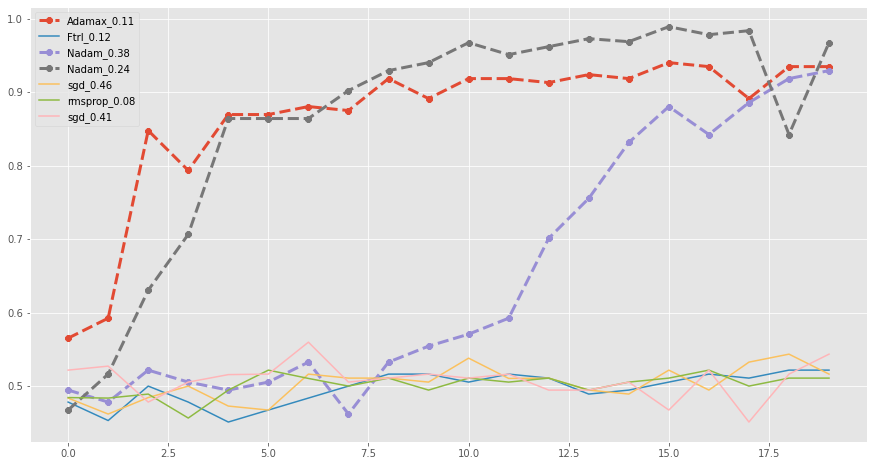

In [20]:
import matplotlib.pyplot as plt

oplist = ['adadelta','adam','rmsprop', 'sgd', 'Ftrl', 'Nadam', 'Adamax']
plt.figure(figsize=(15,8))
#cmap = plt.get_cmap('jet_r')
plt.style.use('ggplot')
with plt.ion():
    for i in range(7):
        opti = trials.vals['optimizer'][i]
        opti = oplist[opti]
        loss = trials.trials[i]['result']['history.acc']
        new_list = set(loss)
        new_list.remove(max(new_list))
        if(max(new_list) > 0.71):
            plt.plot(loss,  linewidth=3, linestyle = 'dashed', marker='8')
        #plt.figure(figsize=(15,8))
        else:
            plt.plot(loss)
        plt.legend(opl)
    



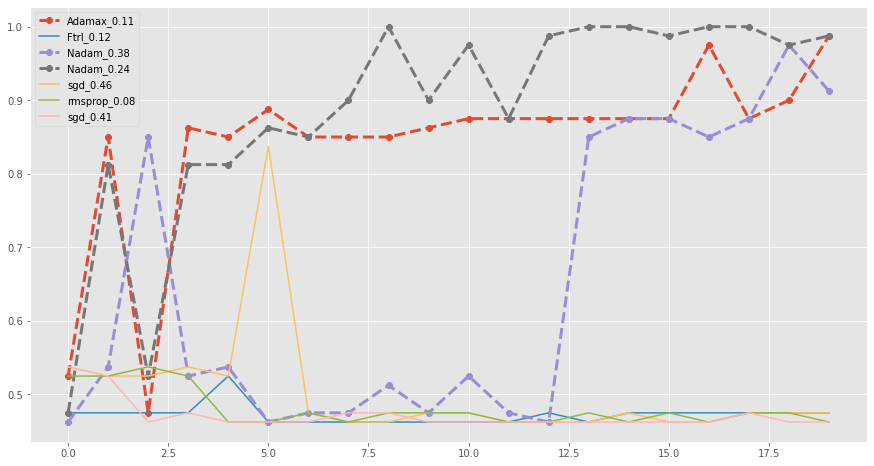

In [23]:
import matplotlib.pyplot as plt
oplist = ['adadelta','adam','rmsprop', 'sgd', 'Ftrl', 'Nadam', 'Adamax']
plt.figure(figsize=(15,8))
for i in range(7):
    opti = trials.vals['optimizer'][i]
    opti = oplist[opti]
    loss = trials.trials[i]['result']['history.val_acc']
    new_list = set(loss)
    new_list.remove(max(new_list))
    if(max(new_list) > 0.71):
        plt.plot(loss,  linewidth=3, linestyle = 'dashed', marker='8')
    else:
        plt.plot(loss)
    #plt.figure(figsize=(15,8))
    plt.legend(opl)
    

In [69]:
trials.trials[4]['result']['model'].summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 223, 223, 32)      416       
_________________________________________________________________
activation_95 (Activation)   (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_96 (Activation)   (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 54, 54, 64)      